In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/jamshid-ds/praktikum_datasets/main/reklama_sales.csv')
df.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


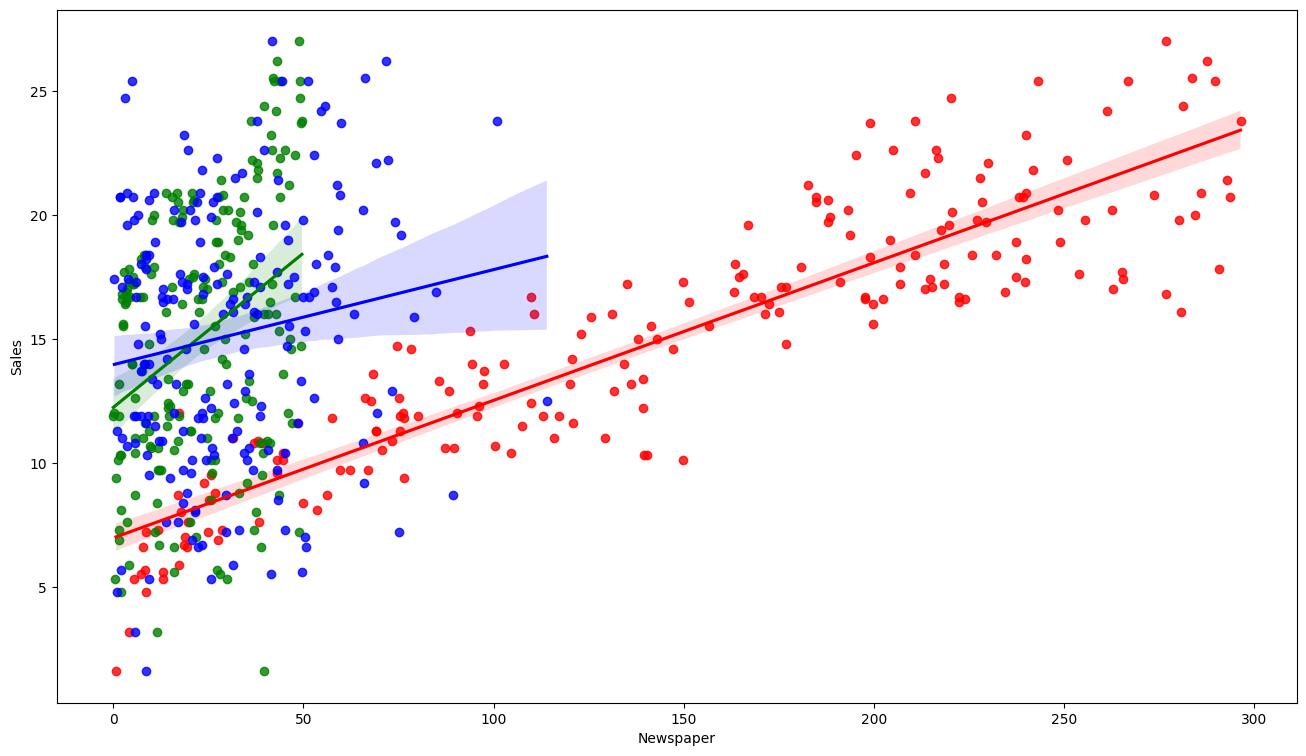

In [19]:
plt.figure(figsize=(16,9))
sns.regplot(data=df, x="TV", y="Sales", color='r')
sns.regplot(data=df, x="Radio", y="Sales", color='g')
sns.regplot(data=df, x="Newspaper", y="Sales", color='b')
plt.show()

###We found that the best way is to trade through Radion

In [22]:
from sklearn.model_selection import train_test_split
df = df[['Radio',"Sales"]]
train_set, test_set = train_test_split(df, test_size=0.1, random_state=2)
X_train = np.asanyarray(train_set[['Radio']])
Y_train = np.asanyarray(train_set[['Sales']])
from sklearn.linear_model import LinearRegression
sales_model = LinearRegression()
sales_model.fit(X_train, Y_train)

LinearRegression()

In [23]:
X_test = np.asanyarray(test_set[['Radio']])
Y_test = np.asanyarray(test_set[['Sales']])
Y_predict = sales_model.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
y_pretected = sales_model.predict(X_test)
MAE = mean_absolute_error(Y_test, y_pretected)
RMSE = np.sqrt(mean_squared_error(Y_test, y_pretected))
per_err = mean_absolute_percentage_error(Y_test, y_pretected)

In [25]:
print(MAE, RMSE, per_err)

4.323702955968299 4.988890191233041 0.36188060208133366


In [26]:
import joblib
joblib.dump(sales_model,"sale_predection_model")

['sale_predection_model']